In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import spectral
from scipy import sparse
import pytest
from equations import SoundWaves, CGLEquation

In [2]:
N = 128
dtype = np.float64
x_basis = spectral.Chebyshev(N, interval=(0, 3))
domain = spectral.Domain([x_basis])
x = x_basis.grid()
u = spectral.Field(domain, dtype=dtype)
p = spectral.Field(domain, dtype=dtype)
p0 = spectral.Field(domain, dtype=dtype)

u.require_grid_space()
u.data = np.exp(-(x-0.5)**2/0.01)

p0.require_grid_space()
p0.data = 0.1 + x**2/9
# p0.data = 1 + 0*x

waves = SoundWaves(domain, u, p, p0)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [2]:
N = 128
dtype = np.float64
x_basis = spectral.Chebyshev(N, interval=(0, 3))
domain = spectral.Domain([x_basis])
x = x_basis.grid()
u = spectral.Field(domain, dtype=dtype)

u.require_grid_space()
u.data = np.exp(-(x-0.5)**2/0.01)

CGL = CGLEquation(domain, u)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [21]:
dudx = spectral.Field(domain, dtype=dtype)
dudx.data[-1] = 0
dudx.data[-2] = 2*(N-1)*u.data[-1]
for n in range(N-3, 0, -1):
    dudx.data[n] = dudx.data[n+2] + 2*(n+1)*u.data[n+1]
dudx.data[0] = 0.5*dudx.data[2] + u.data[1]

In [22]:
dudx.data

array([-2.71894127e-02,  1.88480411e-02, -1.21725830e-01, -1.66065487e-01,
        1.23375652e-01,  5.09323913e-01,  3.64010530e-01, -1.18330813e-01,
       -2.34301729e-01, -2.83089586e-01, -4.76833727e-01, -4.87475890e-01,
        3.70916744e-01,  1.01748700e+00,  5.00056117e-01, -4.33009507e-01,
       -4.75525197e-01, -2.40429025e-01, -3.98788260e-01, -3.60788254e-01,
        4.96104331e-01,  1.06790840e+00,  3.11763524e-01, -6.04025485e-01,
       -4.73125639e-01,  6.11391571e-02, -1.27644396e-01, -2.90979117e-01,
        3.29010870e-01,  6.65729117e-01,  1.13530985e-01, -5.78486662e-01,
       -3.03167239e-01,  2.16919263e-01,  5.40090795e-02, -1.97677195e-01,
        1.08208385e-01,  3.87277157e-01,  4.16832787e-02, -3.74194431e-01,
       -1.56531414e-01,  2.01521426e-01,  9.01613499e-02, -1.52135695e-01,
       -1.28812808e-02,  1.90894935e-01,  5.01884669e-02, -1.73461969e-01,
       -8.56184835e-02,  9.84363210e-02,  6.02602441e-02, -7.75259249e-02,
       -3.09205129e-02,  

In [3]:
assert len(waves.problem.pencils[0].M.data) < 5*N
assert len(waves.problem.pencils[0].L.data) < 5*N

<IPython.core.display.Javascript object>


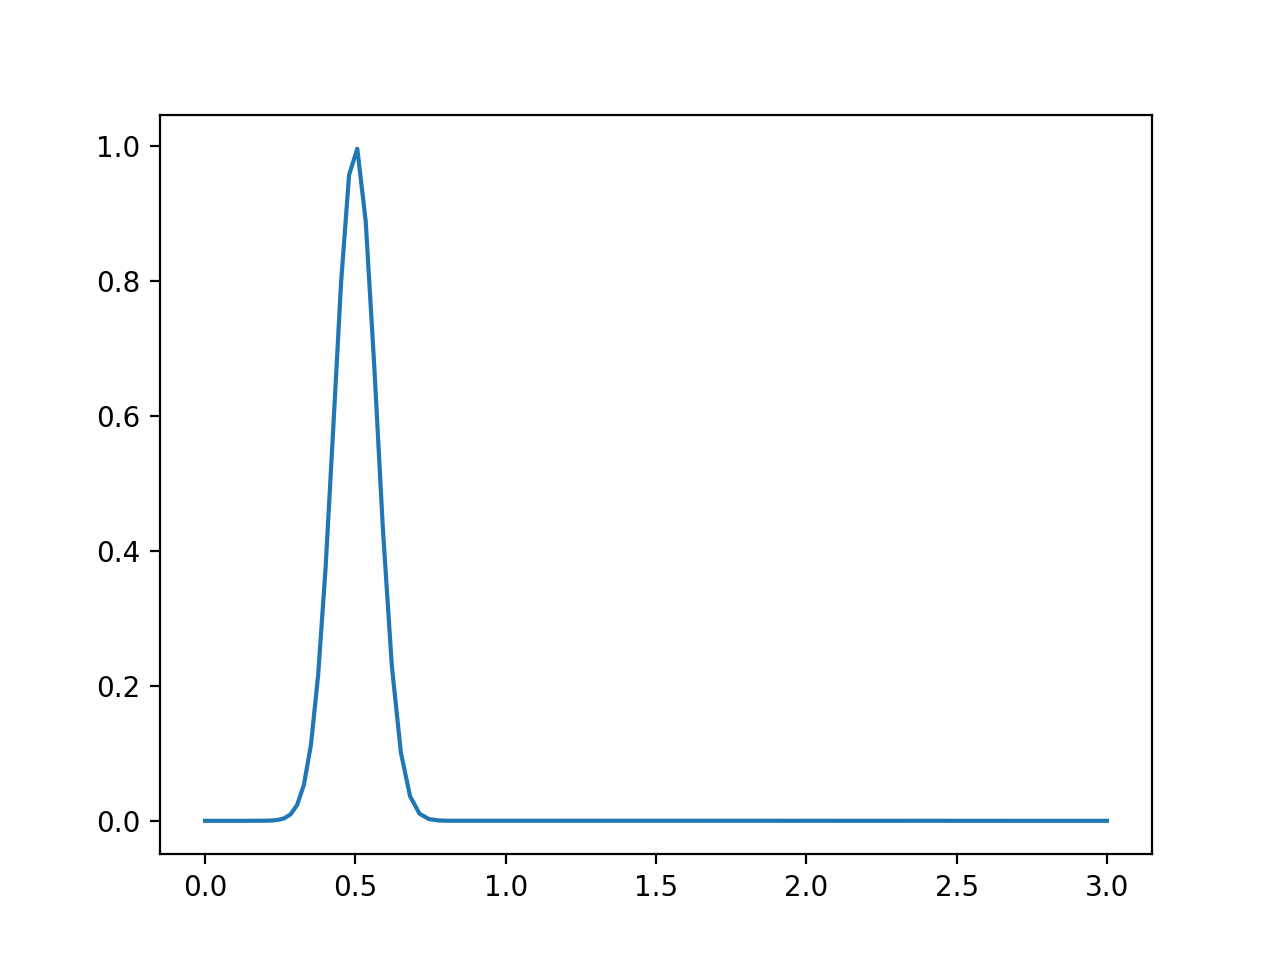

In [3]:
dt = 2e-3
num_steps = 2500
plt.figure()
plt.plot(x,u.data)

In [5]:
waves.evolve(spectral.SBDF2, 2e-3, 2500)

p.require_coeff_space()
p.require_grid_space(scales=256//N)

<IPython.core.display.Javascript object>


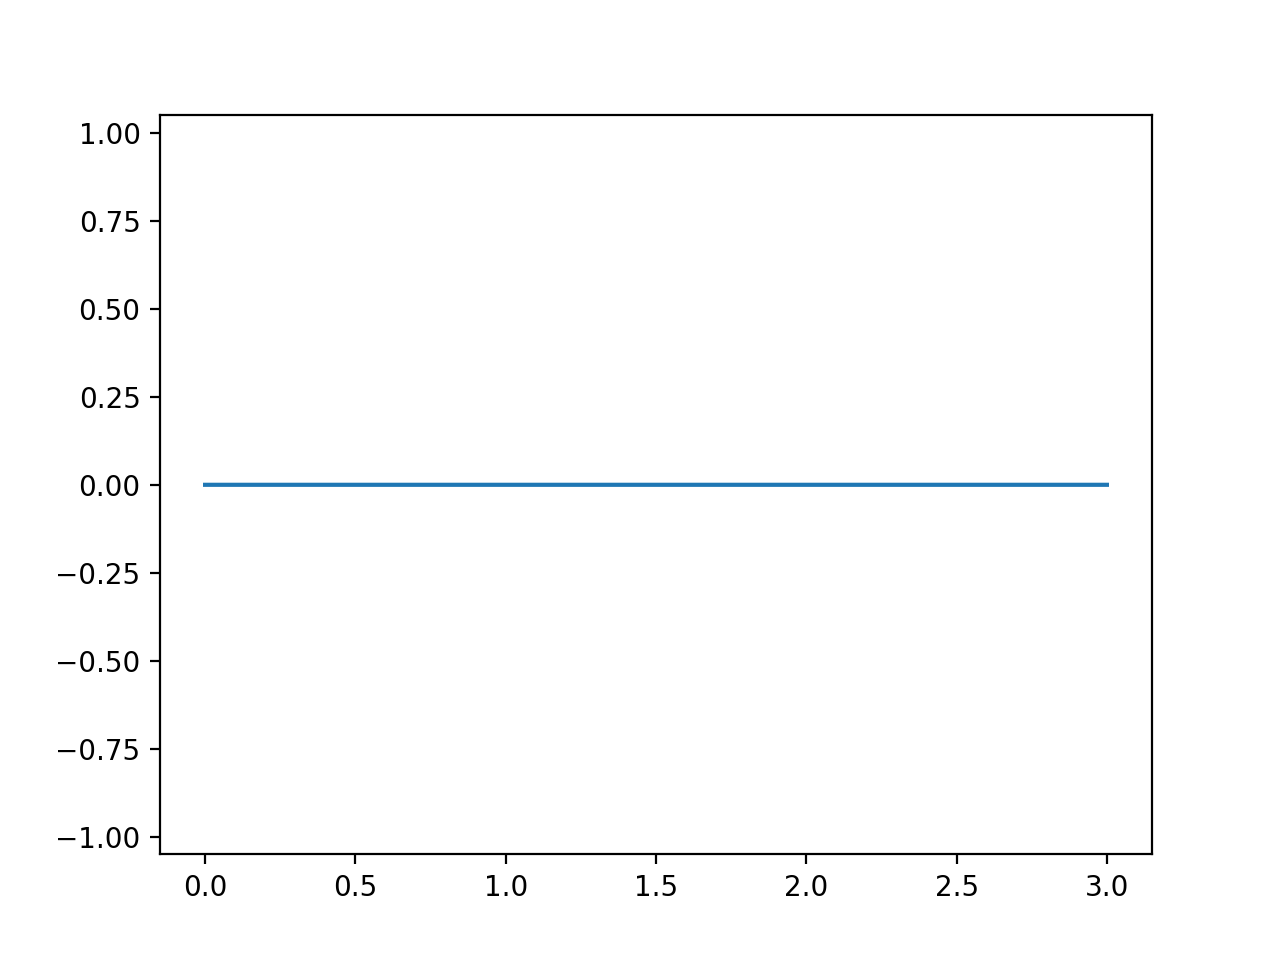

/Users/jonathancao/Desktop/2021-2022/2022 Winter/ES_APPM-446/spectral.py:515: ComplexWarning: Casting complex values to real discards the imaginary part
  vector[i*N:(i+1)*N] = field.data[self.slices].ravel()
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/data.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  self._deduped_data().astype(dtype, casting=casting, copy=copy),
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/jonathancao/Desktop/2021-2022/2022 Winter/ES_APPM-446/spectral.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff_data[zero] = data[zero]
/Users/jonathancao/Desktop/2021-2022/2022 Winter/ES_APPM-446/spectral.py:67: ComplexWarning: Casting complex values t

In [5]:
fig = plt.figure()
u.require_grid_space()
p, = plt.plot(x, u.data)
fig.canvas.draw()
plt.ylim([-1.05,1.05])

for i in range(num_steps//5):
    CGL.evolve(spectral.SBDF2, dt, 5)
    u.require_grid_space()
    p.set_ydata(u.data.real)
    fig.canvas.draw()

In [6]:
sol = np.loadtxt('waves_variable.dat')

<IPython.core.display.Javascript object>


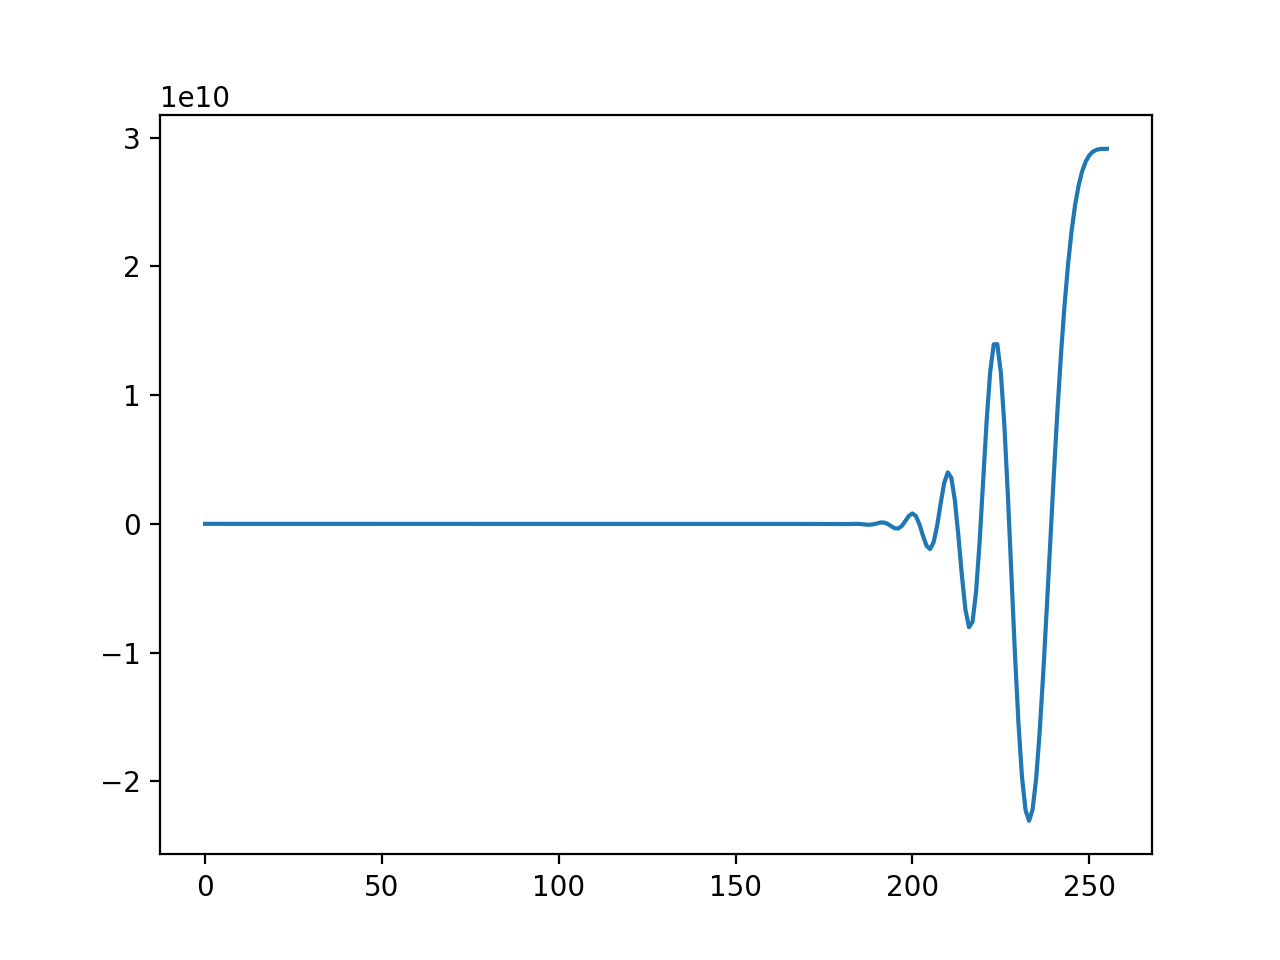

In [7]:
plt.figure()
plt.plot(p.data)
# plt.plot(sol)

<IPython.core.display.Javascript object>


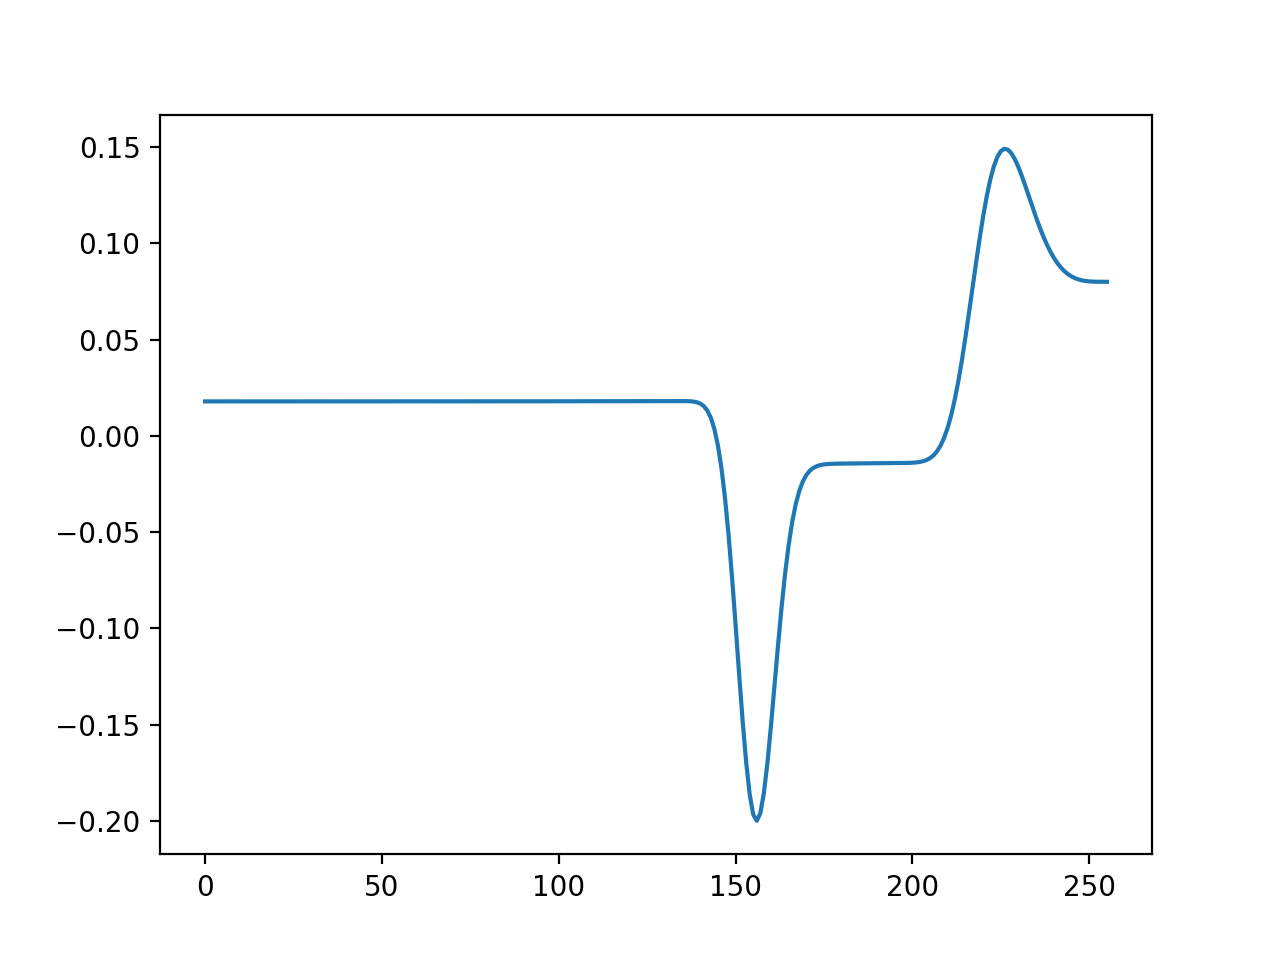

In [7]:
plt.figure()
plt.plot(sol)

In [9]:
p.data

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na